# 1. Keras 텍스트 전처리
    1. [수치 데이터로 변환] 텍스트 토큰화 및 정수 인코딩
    2. [같은 길이로 만들기] 패딩 (padding)

In [1]:
# tensorflow 설치 확인
import tensorflow
tensorflow.__version__

'2.10.0'

In [8]:
print(tensorflow.config.list_physical_device('GPU'))

AttributeError: module 'tensorflow._api.v2.config' has no attribute 'list_physical_device'

In [5]:
# 연습 샘플
texts = [
    "나는 학교에 간다",
    "너는 도서관에 간다",
    "그는 시장에 간다"
]
#texts = [ ["나", "학교", "가"], ["너", "도서관", "가"], ["그", "시장", "가"]]

## 1-1. 텍스트 데이터 Integer Encoding
- num_words = 사용할 단어 수 + 1

In [7]:
# Tokenizer 객체 생성 (특징 벡터용 단어 수와 OOV 토큰 지정)
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer=Tokenizer(num_words=3, oov_token="<OOV>")
# 특징 집합 생성 및 정수 indexing
tokenizer.fit_on_texts(texts)
print("단어 사전:",tokenizer.word_index)

# 입력 텍스트 리스트의 integer encoding
encoded_texts =tokenizer.texts_to_sequences(texts)
print("정수 인코딩 결과:", encoded_texts)


단어 사전: {'<OOV>': 1, '간다': 2, '나는': 3, '학교에': 4, '너는': 5, '도서관에': 6, '그는': 7, '시장에': 8}
정수 인코딩 결과: [[1, 1, 2], [1, 1, 2], [1, 1, 2]]


## 1-2. Padding : 입력 시퀀스의 길이를 동일하게 조정하기

In [9]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
padded_sequences = pad_sequences(encoded_texts, maxlen=2, padding='post', truncating='post')
#길이의 분포를 보고 함 
print("패딩된 시퀀스 :")
print(padded_sequences)

패딩된 시퀀스 :
[[1 1]
 [1 1]
 [1 1]]


## 1-3. 정답 데이터 One-hot Encoding

In [11]:
label = [1, 4, 2, 7, 1, 2, 3]
from tensorflow.keras.utils import to_categorical 

encoded_label = to_categorical(label)
encoded_label
#0부터 최대값을 확인
#수치화해서 하기 

array([[0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0.]], dtype=float32)

# 2. 텍스트 전처리를 위한 파라미터 결정하기
- Integer Encoding을 위한 단어(특징) 집합의 크기 정하기 (Tokenizer의 num_words)
- Padding을 위한 시퀀스 길이 정하기 (pad_sequences의 max_len) 

In [15]:
# 데이터 로딩 및 실습 데이터 추출
import pandas as pd
texts = list(pd.read_csv('../data/Korean_movie_reviews_2016.csv').review)
texts[:2]

['부산 행 때문 너무 기대하고 봤', '한국 좀비 영화 어색하지 않게 만들어졌 놀랍']

## 2-1. 단어 집합의 크기 정하기 (Tokenizer의 num_words)
등장 빈도수가 기준값(threshold)보다 적은 단어의 비중을 확인하여 정하기
1. corpus의 전체 단어 수 (total_cnt)와 전체 빈도수 (total_freq) 계산
2. threshold보다 빈도수가 적은 단어수 카운트 (rare_cnt)와 빈도수 (rare_freq) 계산
3. 희귀 단어의 비율(rare_cnt/total_cnt)과 희귀 등장 빈도 비율 계산(rare_freq/total_freq)
4. 희귀 단어를 뺀 단어 수 -> 단어 집합의 크기 산정

In [27]:
# Tokenizer로 단어-빈도 사전 생성
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer=Tokenizer()
tokenizer.fit_on_texts(texts)
f'{len(tokenizer.word_index):,}'
f'{len(tokenizer.word_index):,.2f}'
#세자리 넣으려면 f string을 작성하면 됨 95.23 소수점 .2f

'52,011.00'

In [49]:
#tokenizer.word_counts.items() #key value형태가 넘어옴 


In [43]:
# 등장 빈도수가 threshold회 미만인 단어들이 이 데이터에서 얼만큼의 비중을 차지하는지 확인
threshold=1
total_cnt=len(tokenizer.word_index)
total_freq=0
rare_cnt=0
rare_freq=0

for word, freq in tokenizer.word_counts.items():
    total_freq += freq

    if(freq < threshold):
        rare_cnt += 1
        rare_freq += freq
        #희귀단어

print(f'전체 단어:{total_cnt:,}개{total_freq:,}번')
print(f'희귀 단어:{rare_cnt:,}개 {rare_freq:,}번')
print(f'희귀 단어 비율:{(rare_cnt/total_cnt)*100:.2f}%')
print(f'희귀 단어 빈도 비율:{(rare_cnt/total_freq) *100:.2f}%')
print(f'희귀 단어를 뺀 단어 수 :{total_cnt- rare_cnt:,}개')

전체 단어:52,011개1,888,659번
희귀 단어:0개 0번
희귀 단어 비율:0.00%
희귀 단어 빈도 비율:0.00%
희귀 단어를 뺀 단어 수 :52,011개


## 2-2. Padding 길이 정하기 (pad_sequences의 max_len)
1. 단어 길이 데이터로 DataFrame 생성
2. 분포 시각화 : DataFrame의 Histogram 시각화 (df.hist())
3. 단어 길이 통계 정보 확인 (df.describe())
4. 텍스트의 길이가 설정한 max_len 이하인 비율 계산

In [55]:
texts[:5]
#단어 길이  DataFrame 생성  공백기준으로 

['부산 행 때문 너무 기대하고 봤',
 '한국 좀비 영화 어색하지 않게 만들어졌 놀랍',
 '조금 전 보고 왔 지루하다 언제 끝나 이 생각 드',
 '평 밥 끼 먹자 돈 니 내고 미친 놈 정신사 좀 알 싶어 그래 밥 먹다 먹던 숟가락 대가리 존나 때릴 지도 모르 일단 면상 확인하고 싶다 전화번호 남겨 놔 진짜',
 '점수 대가 과 이 엑소 팬 어중간 점수 줄리 없겠 클레멘타인 이후 최고 평점 조작 영화 아닐 생각 드네']

In [63]:
#단어 길이 데이터로 DataFrame 생성
#길이를 정하기 
#각데이터 분석은 -> 프레임 5개 #히스토그램 최대 중앙 평균 25 75퍼센트 
#40개를 단어를 쓰겠다. 확인을 하겠음 
import pandas as pd 
#단어 길이 리스트 생성
#text가 text의 리스트임 
#len_list=[texts]
len_list=[len(text.split()) for text in texts]

#단어 길이  DataFrame 생성
len_df=pd.DataFrame(len_list,columns=['length']) 
len_df.head()
#칼람명이 있어야됨 

,length
0,6
1,7
2,10
3,31
4,19


array([[<Axes: title={'center': 'length'}>]], dtype=object)

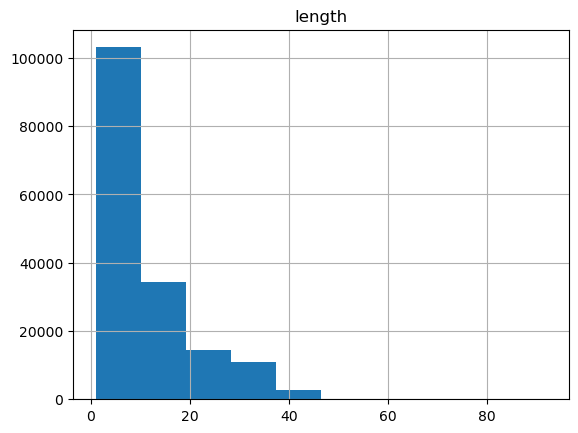

In [71]:
# 분포 시각화 : DataFrame의 Histogram 시각화 (df.hist())
len_df.describe()
#1개 최대92 
#15개 이하 
len_df.hist()

In [105]:
#단어 길이 통계 정보 확인 (df.describe())
max_len = 40
count= 0 #max_len 이하인 문장의 수

for length in len_list:
    if(length <= max_len):
        count +=1



In [107]:
#텍스트의 길이가 설정한 max_len 이하인 비율 계산
print(f'길이가 {max_len} 이하인 데이터 비울:{(count/len(len_list))* 100:.2f}%')
#post면 앞에것이 짤림 #다른것이면 뒤에것이 짤림 

길이가 40 이하인 데이터 비울:99.58%
